In [1]:
from collections import namedtuple
import re
import sys

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# We are reading here the output of the following process which was run outside of this notebook:
# python examples/find_patterns_in_collection.py <PATH_TO_DIRECOTRY_CONTAINING_SGF_FILES> 9 9 3 10 40 True gotopics

# collection_df = pd.read_csv("C:/Users/sorin/Documents/GitHub/gopatterns/collection_gotopics_9.9.3.10.40.True_numgames_23517.csv")
collection_df = pd.read_csv("D:/gopatterns_working_dir/output/collection_human_games_10x10_min2_max10_numgames_202804.csv")

In [3]:
collection_df['sgf_filename'] = collection_df['sgf_filename'].str[len("C/Users/sorin/igo/kifu/collections/"):]

In [4]:
# Number of patterns
collection_df.shape[0]

5676766

In [5]:
# Year span of this collection
collection_df['year'].min(), collection_df['year'].max()

(23, 2018)

In [6]:
collection_df['year'].value_counts()

2008    181725
2009    174688
2003    172007
2007    166311
2005    160127
2002    156745
2012    154265
2001    151785
2016    149779
2010    141451
2014    139293
2015    138372
2000    136190
2004    135822
1996    132423
2011    132386
2013    128468
1997    122002
1995    112457
2017    111825
1998    111391
1999    104537
1993    100050
1991     99772
1992     99385
1990     95577
1989     93262
2006     90537
1994     89419
1988     70459
         ...  
1726        65
1757        65
1728        65
1646        64
1677        64
1648        64
1762        63
1742        63
1731        62
1625        60
1691        60
1720        50
1094        44
1721        36
1745        36
23          35
1746        35
196         33
1629        32
1645        32
1724        32
1734        31
1647        28
1062        28
216         28
1561        12
1664        12
1620        11
1751        10
1566        10
Name: year, Length: 365, dtype: int64

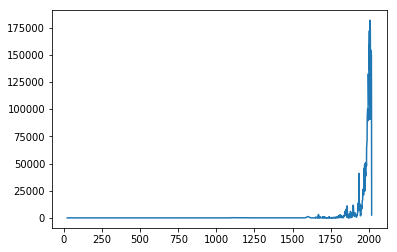

In [7]:
pyears = pd.DataFrame()
yvc = collection_df['year'].value_counts()
pyears['year'] = yvc.index
pyears['count'] = yvc.values
pyears = pyears.sort_values(by='year')
plt.plot(pyears['year'], pyears['count'])

681


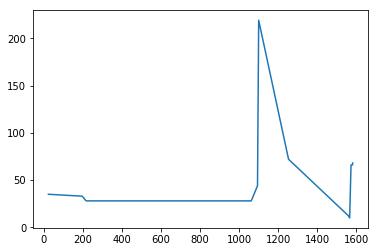

In [8]:
d = pyears[pyears['year'] < 1600]
print(d['count'].sum())
plt.plot(d['year'], d['count'])

1935


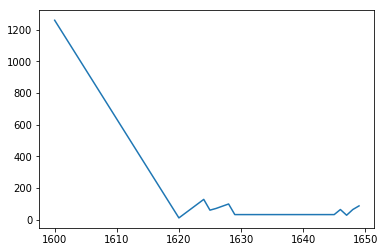

In [9]:
d = pyears[(pyears['year'] >= 1600) & (pyears['year'] < 1650)]
print(d['count'].sum())
plt.plot(d['year'], d['count'])

19352


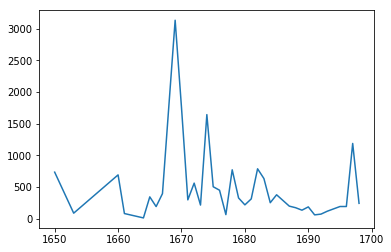

In [10]:
d = pyears[(pyears['year'] >= 1650) & (pyears['year'] < 1700)]
print(d['count'].sum())
plt.plot(d['year'], d['count'])

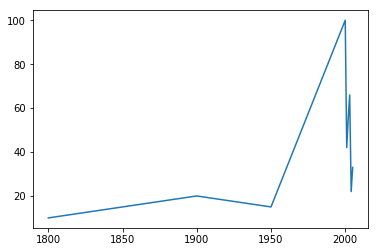

In [18]:
test_versions = [1800, 1900, 1950, 2000, 2001, 2002, 2003, 2004, 2005]
test_data = [10, 20, 15, 100, 42, 55, 66, 22, 33]
plt.plot(test_versions, test_data)

(array([1750., 1800., 1850., 1900., 1950., 2000., 2050.]),
 <a list of 7 Text xticklabel objects>)

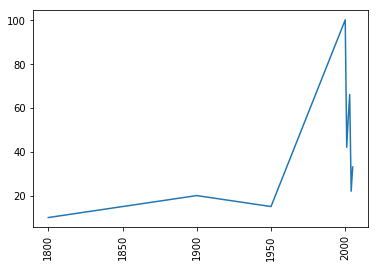

In [19]:
plt.plot(test_versions, test_data)
plt.xticks(rotation=90)

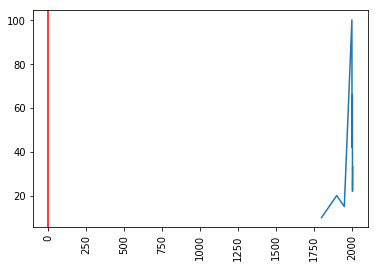

In [20]:
plt.plot(test_versions, test_data)
plt.xticks(rotation=90)
plt.axvline(0, color='red')

[1750. 1800. 1850. 1900. 1950. 2000. 2050.]


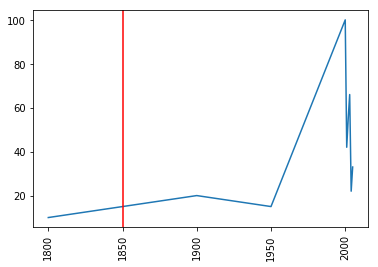

In [23]:
plt.plot(test_versions, test_data)
locs, _ = plt.xticks()
print(locs)
plt.xticks(rotation=90)
plt.axvline(1850, color='red')

[-1.  0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


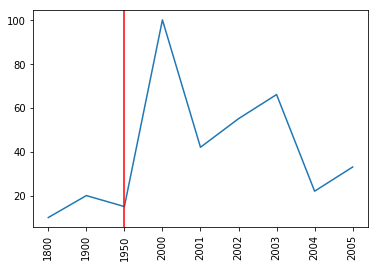

In [34]:
plt.plot(test_data)
locs, _ = plt.xticks()
print(locs)
plt.xticks(range(len(test_versions)), test_versions, rotation=90)
# plt.axvline(1850, color='red')
plt.axvline(x=2, color='red')

([<matplotlib.axis.XTick at 0x2d76f258cf8>,
 <a list of 5 Text xticklabel objects>)

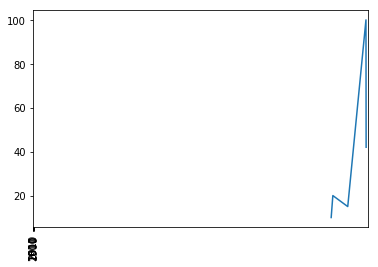

In [15]:
plt.plot(test_versions, test_data)
plt.xticks(range(len(test_versions)), test_versions, rotation='vertical')

[1750. 1800. 1850. 1900. 1950. 2000. 2050.]


([<matplotlib.axis.XTick at 0x2d741609e48>,
 <a list of 5 Text xticklabel objects>)

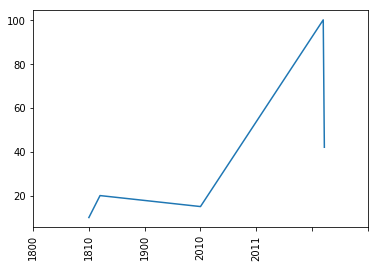

In [16]:
plt.plot(test_versions, test_data)
locs, _ = plt.xticks()
print(locs)
plt.xticks(locs, test_versions, rotation='vertical')

9199


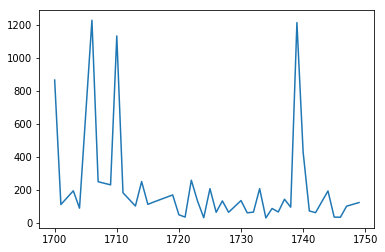

In [95]:
d = pyears[(pyears['year'] >= 1700) & (pyears['year'] < 1750)]
print(d['count'].sum())
plt.plot(d['year'], d['count'])

14681


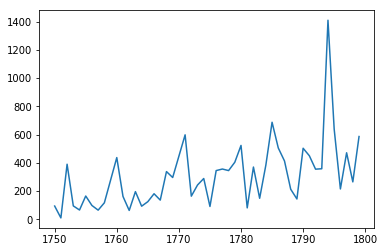

In [96]:
d = pyears[(pyears['year'] >= 1750) & (pyears['year'] < 1800)]
print(d['count'].sum())
plt.plot(d['year'], d['count'])

86375


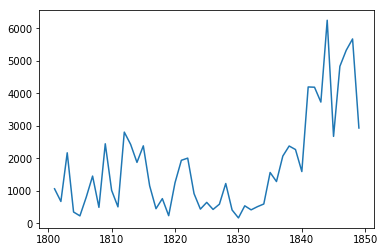

In [97]:
d = pyears[(pyears['year'] >= 1800) & (pyears['year'] < 1850)]
print(d['count'].sum())
plt.plot(d['year'], d['count'])

164311


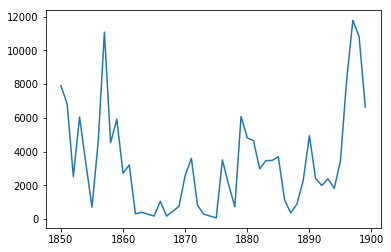

In [98]:
d = pyears[(pyears['year'] >= 1850) & (pyears['year'] < 1900)]
print(d['count'].sum())
plt.plot(d['year'], d['count'])

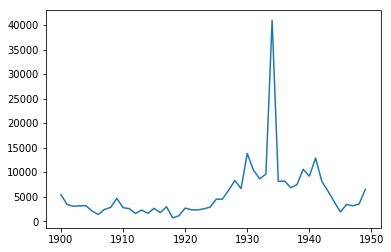

In [80]:
d = pyears[(pyears['year'] >= 1900) & (pyears['year'] < 1950)]
plt.plot(d['year'], d['count'])

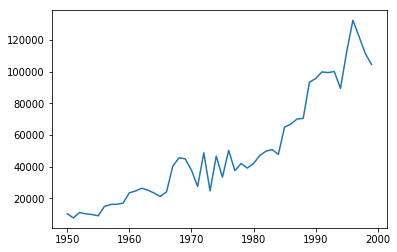

In [81]:
d = pyears[(pyears['year'] >= 1950) & (pyears['year'] < 2000)]
plt.plot(d['year'], d['count'])

In [9]:
collection_df['year'].loc[collection_df['year']==23] = 2003

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [19]:
collection_df['year'].loc[collection_df['year']<=1700] = 1700

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
collection_df['year'].loc[(collection_df['year'] > 1700) & (collection_df['year']<=1750)] = 1750

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
collection_df['year'].loc[(collection_df['year'] > 1750) & (collection_df['year']<=1800)] = 1800

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
collection_df['year'].loc[(collection_df['year'] > 1800) & (collection_df['year']<=1850)] = 1850

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
collection_df['year'].loc[(collection_df['year'] > 1850) & (collection_df['year']<=1900)] = 1900

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
collection_df['year'].loc[(collection_df['year'] > 1900) & (collection_df['year']<=1925)] = 1925

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
collection_df['year'].loc[(collection_df['year'] > 1925) & (collection_df['year']<=1950)] = 1950

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
collection_df['year'].loc[(collection_df['year'] > 1950) & (collection_df['year']<=1960)] = 1960

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
collection_df['year'].loc[(collection_df['year'] > 1960) & (collection_df['year']<=1970)] = 1970

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
collection_df['year'].loc[(collection_df['year'] > 1970) & (collection_df['year']<=1980)] = 1980

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
collection_df['year'].loc[(collection_df['year'] > 1980) & (collection_df['year']<=1985)] = 1985

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [46]:
collection_df['year'].loc[(collection_df['year'] > 1985) & (collection_df['year']<=1990)] = 1990

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [48]:
collection_df[['year', 'sgf_filename']].sort_values(by='year').head(5)

,year,sgf_filename
5447972,1700,\moyogo\42784games\38303.sgf
180199,1700,\aeb\games\Dosaku\021.sgf
180200,1700,\aeb\games\Dosaku\022.sgf
180201,1700,\aeb\games\Dosaku\022.sgf
180202,1700,\aeb\games\Dosaku\022.sgf


In [49]:
# TODO collection_df.sort_values(by=['year', 'sgf_filename']).to_csv("D:/gopatterns_working_dir/output/collection_human_games_10x10_min2_max10_numgames_202804_grouped.csv", index=None)

In [50]:
collection_df['year'].loc[(collection_df['year'] > 1990) & (collection_df['year']<=1995)] = 1995

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
collection_df['year'].loc[(collection_df['year'] > 1995) & (collection_df['year']<=2000)] = 2000

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [54]:
collection_df['year'].loc[(collection_df['year'] > 2000) & (collection_df['year']<=2005)] = 2005

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [56]:
collection_df['year'].loc[(collection_df['year'] > 2005) & (collection_df['year']<=2010)] = 2010

c:\users\sorin\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [60]:
# TODO collection_df.sort_values(by=['year', 'sgf_filename']).to_csv("D:/gopatterns_working_dir/output/collection_human_games_10x10_min2_max10_numgames_202804_grouped_to_2010.csv", index=None)

In [125]:
collection_df[collection_df['year']<1980].shape

(21, 3)

In [126]:
# Year span of this collection
collection_df = collection_df.drop(collection_df[collection_df['year']<1980].index, axis=0)

In [128]:
collection_df.shape

(414818, 3)

In [134]:
# Find the most frequent patterns in each year, to get some candidates for visualization
min_games_per_year = 10
top_patterns_per_year = 10
years = list(range(collection_df['year'].min(), collection_df['year'].max()+1))
frequent_patterns = set()
for year in years:
    num_games_in_year = collection_df['sgf_filename'][collection_df['year'] == year].unique().shape[0]
    if num_games_in_year < min_games_per_year:
        continue
    top_patterns_in_year = collection_df.where(collection_df['year'] == year)['pattern'].value_counts()
    for i in range(min(top_patterns_per_year, len(top_patterns_in_year))):
        frequent_patterns.add(top_patterns_in_year.index[i])

In [135]:
# How many unique patterns did  we get by picking the top-3 patterns from each year?
len(frequent_patterns)

38

In [136]:
# Visualize the frequency of a given pattern over years, as ratio of number of games in given year with pattern over total
# number of games in given year
# pattern = collection_by_year_df.iloc[0].name[1] # TODO actual pattern, make a function param

PatternMatchInYear = namedtuple('PatternMatchInYear', 'year, num_games_in_year, num_games_in_year_with_pattern, frequency')

# yearly_match_info is a list of PatternMatchInYear items
PatternMatchTimeline = namedtuple('PatternMatchTimeline', 'pattern, yearly_match_info')

years = list(range(collection_df['year'].min(), collection_df['year'].max()+1))
pattern_frequencies = []
for pattern in frequent_patterns:
    yearly_match_info = []
    for year in years:
        num_games_in_year = collection_df['sgf_filename'][collection_df['year'] == year].unique().shape[0]
        num_games_in_year_with_pattern = 0
        try:
            num_games_in_year_with_pattern = collection_df[(collection_df['pattern'] == pattern) & 
                                                               (collection_df['year'] == year)]['sgf_filename'].unique().shape[0]
        except KeyError:
            pass
        assert num_games_in_year >= num_games_in_year_with_pattern
        freq = 0
        if num_games_in_year != 0:
            freq = 1.0 * num_games_in_year_with_pattern / num_games_in_year
        yearly_match_info.append(PatternMatchInYear(year=year, num_games_in_year=num_games_in_year,
                                                    num_games_in_year_with_pattern=num_games_in_year_with_pattern,
                                                    frequency=freq))
    pattern_frequencies.append(PatternMatchTimeline(pattern=pattern, yearly_match_info=yearly_match_info))

In [137]:
len(pattern_frequencies)

38


. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . . . . . =
. . . . . w . . . =
. . . . . . . . . =
= = = = = = = = = =


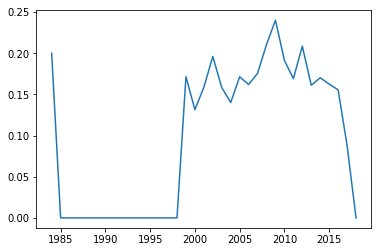



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w . w . b . =
. . . . . . w . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


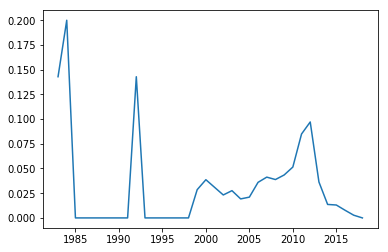



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w . w . . . =
. . . b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


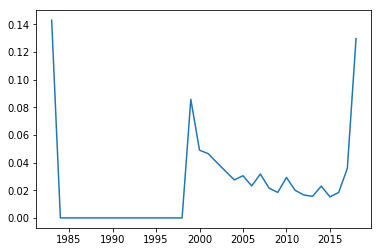



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


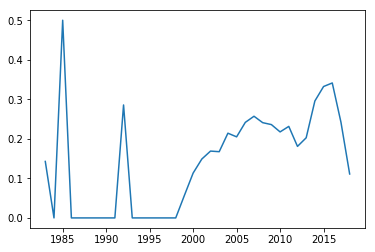



. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . w . . =
w . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


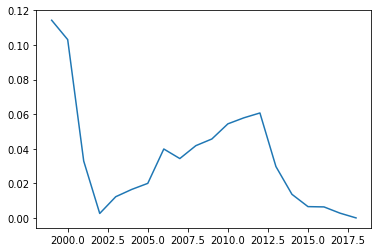



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w w . b . . =
. . . w b b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


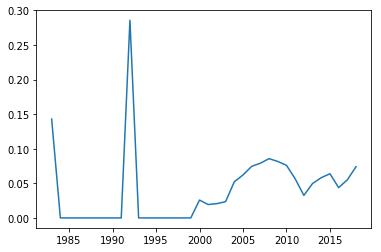



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . . . b w . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


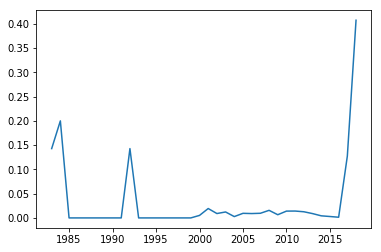



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
w . . w . . b . . =
. . . . . w . . . =
. . . . . . . . . =
= = = = = = = = = =


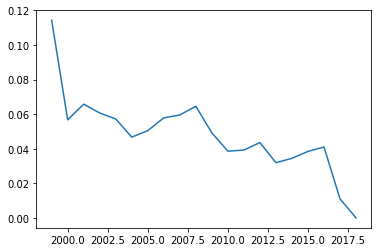



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b b w . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


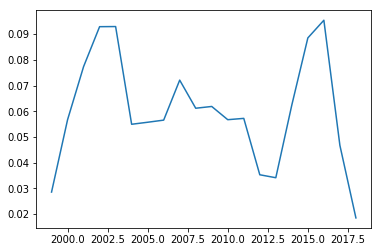



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . w . w . b . . =
. . . w b b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


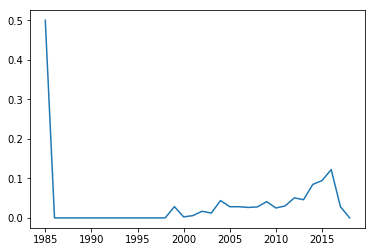



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . w . . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


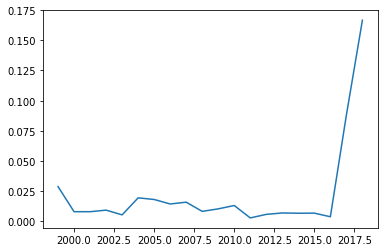



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . w b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


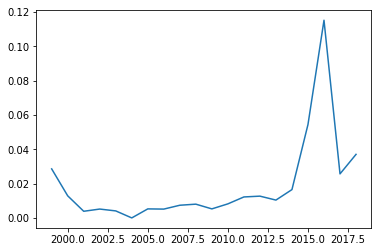



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. b . . . . b . . =
. . . . w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


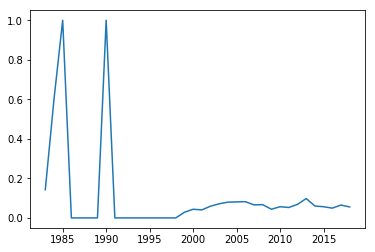



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
. b . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


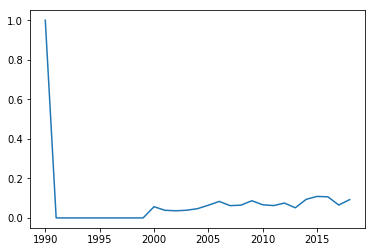



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . b b w . . =
. . . . w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


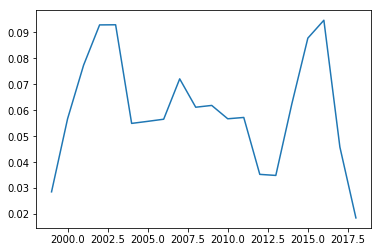



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . w . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


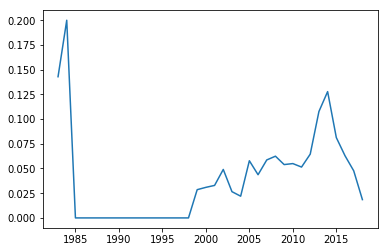



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w . w . b . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


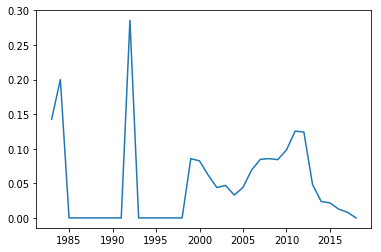



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . b . b . w . . =
. . . b w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


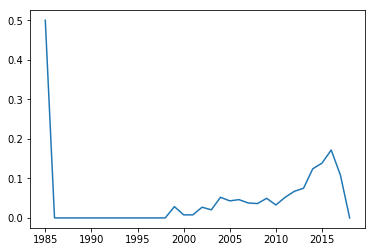



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . w . w . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


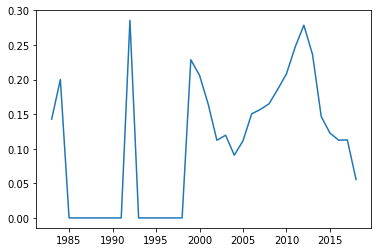



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . w . . . . =
. . . . . w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


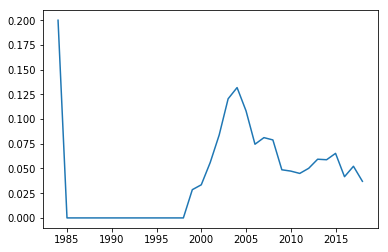



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . w . . . b . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


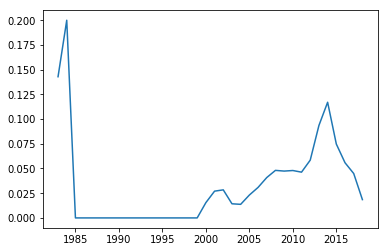



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b b b . . =
. . . b w w w . . =
. . . w . . . . . =
. . . . . . . . . =
= = = = = = = = = =


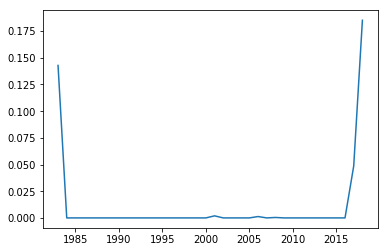



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . . . b b w . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


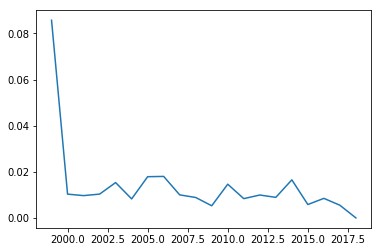



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . b w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


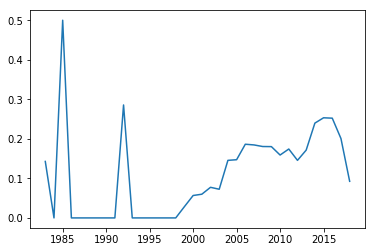



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
b . . . . b . . . =
. . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


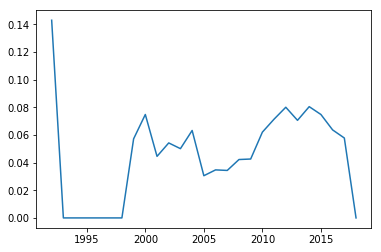



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . w . . . =
. . . b . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


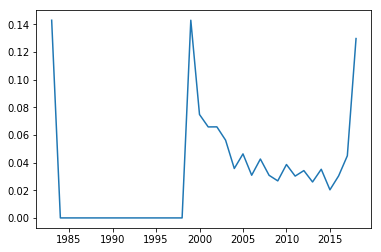



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b b . . =
. . . b . w w . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


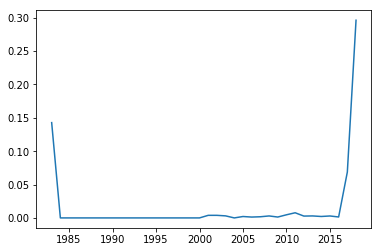



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . . b . . =
. . . . . w . . . =
. . . . . . . . . =
= = = = = = = = = =


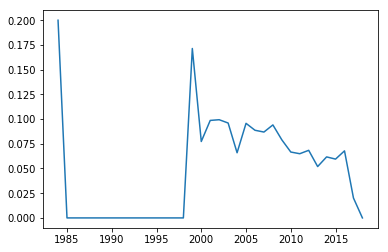



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b b w . . =
. . . . w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


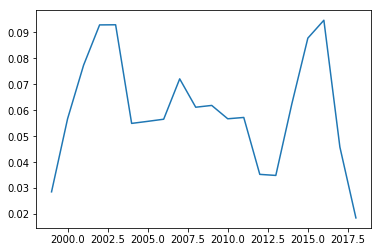



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b . w . . =
. . . b w . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


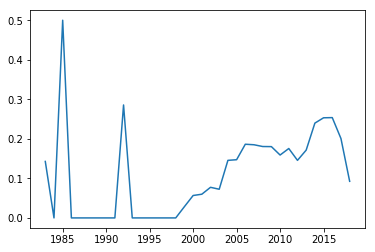



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. b . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


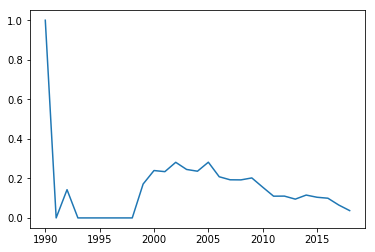



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . . . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


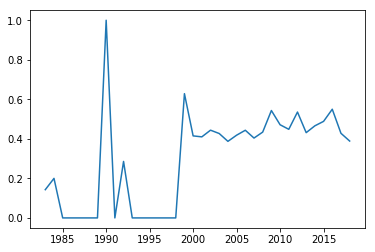



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b b . . =
. . . . . w w . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


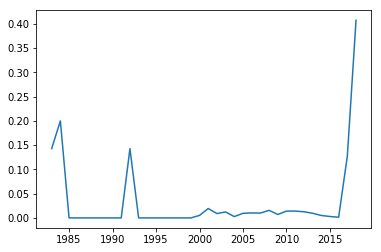



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . b b b . . =
. . . b w w w . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


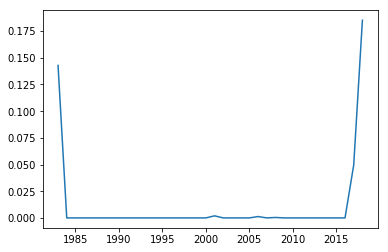



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b b . . =
. . . b w w w . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


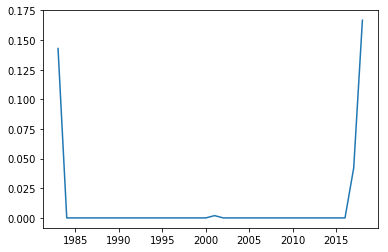



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . b b . w . . =
. . . b w w . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


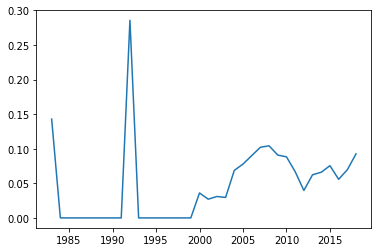



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . b . . . =
. . . w . . . . . =
. . . . b . . . . =
. . . . . . . . . =
= = = = = = = = = =


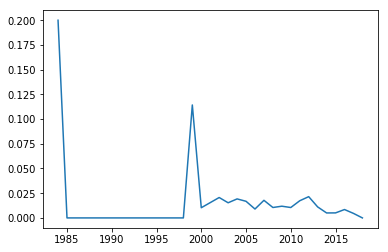



. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . . . . =
. . . . . . b . . =
. . . w . b . . . =
. . . . . . . . . =
. . . . . . . . . =
= = = = = = = = = =


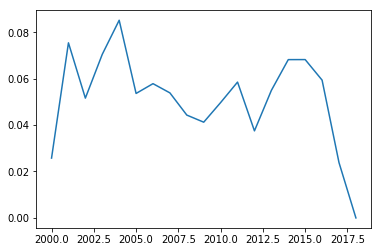

In [138]:
min_years_with_pattern_to_plot = 2
for pattern_frequency_info in pattern_frequencies:
    pat_freq = []
    # skip all zero frequency years in the beginning
    num_skip = 0
    num_years_with_pattern = 0
    done_skip = False
    for info in pattern_frequency_info.yearly_match_info:
        pat_freq.append(info.frequency)
        if info.frequency != 0:
            num_years_with_pattern += 1
        if info.frequency == 0 and not done_skip:
            num_skip += 1
        else:
            done_skip = True
    
    print()
    print(pattern_frequency_info.pattern)
    if num_years_with_pattern < min_years_with_pattern_to_plot:
        print("Skipping plot, only found in %s years" % num_years_with_pattern)
    else:
        plt.figure()
        plt.plot(years[num_skip:], pat_freq[num_skip:])
        plt.show()
    print()